## Introducción

El objetivo fue de **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello se trabajo con datos reales de TomTom Traffic Index y OECD Cities, realizando los procesos de limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

In [26]:
# importar librerías
import pandas as pd
import numpy as npy
import seaborn as sbn
import matplotlib.pyplot as plt

In [27]:
# cargar archivos
traffic = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/tomtom_traffic.csv')
eco = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/oecd_city_economy.csv')

In [28]:
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [29]:
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"



---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

In [30]:
# Examinar la estructura de traffic
traffic.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo` son de tipo object cuando deberia ser "datetime"
- Las columnas `Country` y `City` son de tipo object cuando deberian ser del tipo "string"

In [31]:
# Examinar la estructura de eco
eco.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)`, `Population (M)` son del tipo object cuando deberian ser del tipo "Float"

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

In [32]:
# Estandarizar los nombres de las columnas de traffic
traffic = traffic.rename(columns={"Country":"country",
                                  "City":"city",
                                  "UpdateTimeUTC":"update_time_utc",
                                  "JamsDelay":"jams_delay",
                                  "TrafficIndexLive":"traffic_index_live",
                                  "JamsLengthInKms":"jams_length_kms",
                                  "JamsCount":"jams_count",
                                  "UpdateTimeUTCWeekAgo":"update_time_utc_week_ago",
                                  "TravelTimeLivePer10KmsMins":"travel_time_live_per_10kms_mins",
                                  "TravelTimeHistoricPer10KmsMins":"travel_time_hist_per_10kms_mins",
                                  "MinsDelay":"mins_delay"
                                 })
# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'TrafficIndexWeekAgo', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay'],
      dtype='object')

In [33]:
# Estandarizar los nombres de las columnas de eco
eco = eco.rename(columns={"Year":"year",
                          "City":"city",
                          "Country":"country",
                          "City GDP/capita":"city_gdp_capita",
                          "Unemployment %":"unemployment_pct",
                          "PM2.5 (μg/m³)":"pm25",
                          "Population (M)":"population_m"})

# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [34]:
# Convertimos las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'])
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'])

# verificamos el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_kms                  1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   TrafficIndexWeekAgo              1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

In [35]:
# Limpiamos separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str)\
    .str.replace('.', '')\
    .str.replace(',', '.')\
    .astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str)\
    .str.replace('%', '')\
    .str.replace(',', '.')\
    .astype(float)
eco['population_m'] = eco['population_m'].astype(str)\
    .str.replace(',','.')\
    .astype(float)

# Calculamos la población total en unidades absolutas (Multiplica * 1000000) 
eco['population'] = eco['population_m']*1000000

# verificamos el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm25              30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm25,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

In [36]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,TrafficIndexWeekAgo,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [37]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year']==2024].copy()
eco_2024 = eco[eco['year']==2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,TrafficIndexWeekAgo,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm25,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calculamos los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [38]:
# Calcular los  promedios de trafico por ciudad, país y año
traffic_city_year_2024 =  traffic.groupby(['city','country','year'])\
    .agg({'jams_delay':'mean',
           'traffic_index_live':'mean',
           'jams_length_kms':'mean',
           'jams_count':'mean',
           'mins_delay':'mean',
           'travel_time_live_per_10kms_mins':'mean',
           'travel_time_hist_per_10kms_mins':'mean'  
          }).reset_index()

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,a-coruna,ESP,2025,11.323684,11.055921,1.161513,3.105263,0.402193,15.839864,15.437671
2,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
3,aachen,DEU,2025,16.278289,18.269737,3.400000,4.144737,0.648249,13.347184,12.698935
4,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016


### 🧠 **Momento de reflexión**

En este punto resolvemos dos interrogantes
- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

In [39]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
442,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
704,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
492,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
400,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
422,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
25,almere,NLD,2025,1.833667,5.040000,0.214333,0.596667,-0.063112,9.455774,9.518886
223,dunedin,NZL,2025,1.644408,11.023026,0.306250,0.526316,0.101581,15.436593,15.335011
291,hamilton,NZL,2025,1.448658,7.892617,0.161745,0.473154,-0.197995,13.097767,13.295761
234,el-paso,USA,2024,0.299024,2.340435,0.031114,0.078118,-0.250676,10.690269,10.940945


La ciudad con el mayor tiempo promedio de tráfico es mexico-city


---

## 🧩Paso 5: Unir movilidad y economía

Combinar ambos datasets nos permitira analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [40]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']

# Usamos .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small,eco_2024_small,on=['city','year'],how='inner')

# Mostrar las primeras 5 filas
merged.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,city_gdp_capita,unemployment_pct,pm25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0



---

## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tenemos un dataset limpio y unificado, es momento de **visualizar patrones**.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

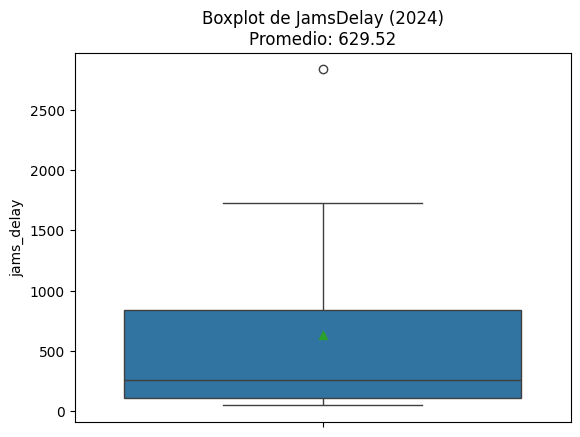

In [41]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
sbn.boxplot(data=merged, y='jams_delay',showmeans=True)
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


Text(0.5, 1.0, 'Valor promedio del PIB per cápita')

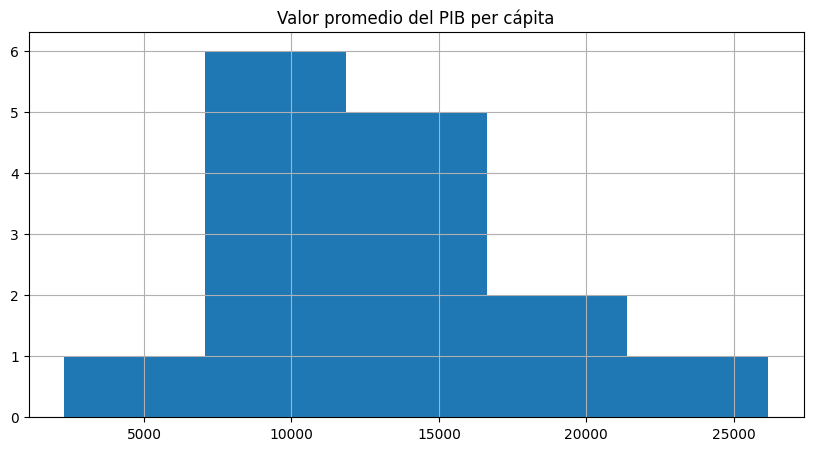

In [42]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
merged['city_gdp_capita'].hist(bins=5,figsize=(10,5))
plt.title(f'Valor promedio del PIB per cápita')

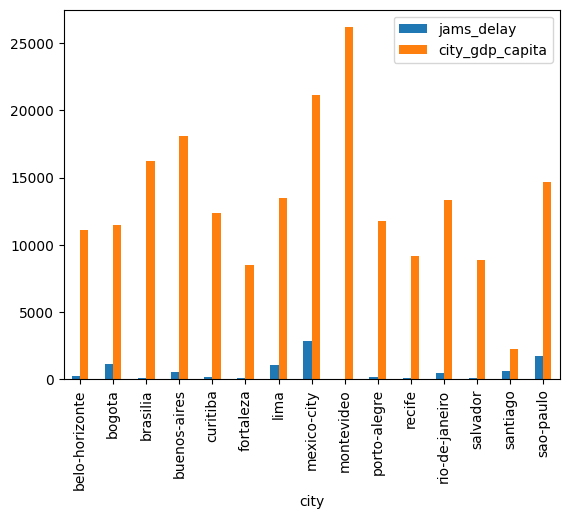

In [43]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
merged.plot( x='city', y=['jams_delay', 'city_gdp_capita'], kind='bar')
plt.xticks(rotation=90)
plt.show()

### 🧠 **Comentario**
las ciudades con mayor PIB no necesariamente representan mas congestion, esto se aprecia en las ciudades como montevideo y buenos aires, las cuales estan en el top 3 de PIB pero no se encuentran en el top 3 de congestion, por tanto no existe una relacion clara.



---

## 🧩Paso 7: Exportar y documentar resultados

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

In [44]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)


---

# 🧾 Resumen ejecutivo

**Contexto & objetivo:**  
- El presente análisis evalúa la relación entre la movilidad urbana y la productividad económica en las principales ciudades de Latinoamérica durante 2024. El objetivo central fue determinar si un mayor PIB per cápita correlaciona directamente con mayores niveles de congestión (Jams Delay), permitiendo identificar cuellos de botella que afectan la competitividad regional y priorizar inversiones en infraestructura de transporte.

**Cobertura de datos:**  
- El estudio abarcó el año 2024, integrando datos de tráfico de TomTom y métricas económicas de la OCDE para ciudades clave en Argentina, Brasil, Colombia, México y Perú. El dataset consolidado permitió comparar métricas de tiempo perdido y riqueza en un entorno urbano estandarizado.

**Metodología:**  
- Se estandarizaron los nombres de columnas a formato snake_case y se transformaron variables críticas (PIB, desempleo y población) de formato texto a numérico para permitir cálculos. Los datos de tráfico se promediaron anualmente para eliminar la volatilidad diaria. Finalmente, se utilizó una unión de tipo INNER para asegurar que solo se analizaran ciudades con información completa en ambas dimensiones (movilidad y economía), validando los resultados mediante histogramas y diagramas de caja para detectar valores atípicos.
  
**Hallazgos iniciales:**  
- Ausencia de correlación lineal: Los datos demuestran que una economía fuerte no implica necesariamente colapso vial. Buenos Aires, con uno de los PIB per cápita más altos de la muestra ($18,117.00), mantiene una demora promedio por congestión de 571.09 min, nivel significativamente menor al de otras capitales.
- Liderazgo en congestión: Ciudad de México se posiciona como el outlier más crítico de la región, liderando el ranking con un jams_delay promedio de 2,833.06 min, superando incluso a potencias globales como Tokio o Nueva York en tiempo perdido.
- Eficiencia relativa: Ciudades como Brasilia muestran una gestión de movilidad superior, con apenas 101.58 min de demora, a pesar de tener un PIB per cápita competitivo de $16,251.00.

**Recomendaciones**  
- Basado en la disparidad entre tiempos de viaje y productividad, Bogotá se perfila como la ciudad prioritaria para inversión urgente. Con una demora por congestión de 1,141.55 min (la segunda más alta de la muestra analizada) y un PIB per cápita de $11,442.00, el costo de oportunidad del tiempo perdido es desproporcionado respecto a su generación de riqueza. Se recomienda priorizar proyectos de transporte masivo en el eje Bogotá-Ciudad de México para mitigar el freno económico que representa la movilidad ineficiente.
